In [5]:
import numpy as np
import itertools
import os
import matplotlib.pyplot as plt

In [13]:

models = ['TGN', 'TGAT', 'DySAT', 'GRAPHSAGE']
datasets = ['WIKI', 'REDDIT', 'MOOC', 'LASTFM']

for model, dataset in itertools.product(models, datasets):
    model = model.lower()
    subdir_baseline = 'tmp_res/sampling_nextdoor_test_unsorted/'
    subdir_nextdoor = 'tmp_res/sampling_nextdoor_test_unsorted_cache/'
    throughput_baseline = np.load(os.path.join(subdir_baseline, f'sampling_throughput_{model}_{dataset}.npy'))
    throughput_nextdoor = np.load(os.path.join(subdir_nextdoor, f'sampling_throughput_{model}_{dataset}.npy'))
    # print(f'Sampling throughput of {model} on {dataset} speedup: {(throughput_nextdoor / throughput_baseline - 1)* 100:.2f}')
    print(f'Sampling throughput of {model} on {dataset}: {throughput_nextdoor:.2f}')


Sampling throughput of tgn on WIKI speedup: -1.52
Sampling throughput of tgn on REDDIT speedup: 2.46
Sampling throughput of tgn on MOOC speedup: 1.37
Sampling throughput of tgn on LASTFM speedup: 1.17
Sampling throughput of tgat on WIKI speedup: 11.77
Sampling throughput of tgat on REDDIT speedup: 0.93
Sampling throughput of tgat on MOOC speedup: 21.89
Sampling throughput of tgat on LASTFM speedup: 1.13
Sampling throughput of dysat on WIKI speedup: 12.48
Sampling throughput of dysat on REDDIT speedup: 4.27
Sampling throughput of dysat on MOOC speedup: -4.11
Sampling throughput of dysat on LASTFM speedup: -1.27
Sampling throughput of graphsage on WIKI speedup: 21.58
Sampling throughput of graphsage on REDDIT speedup: 3.02
Sampling throughput of graphsage on MOOC speedup: -0.60
Sampling throughput of graphsage on LASTFM speedup: -0.96


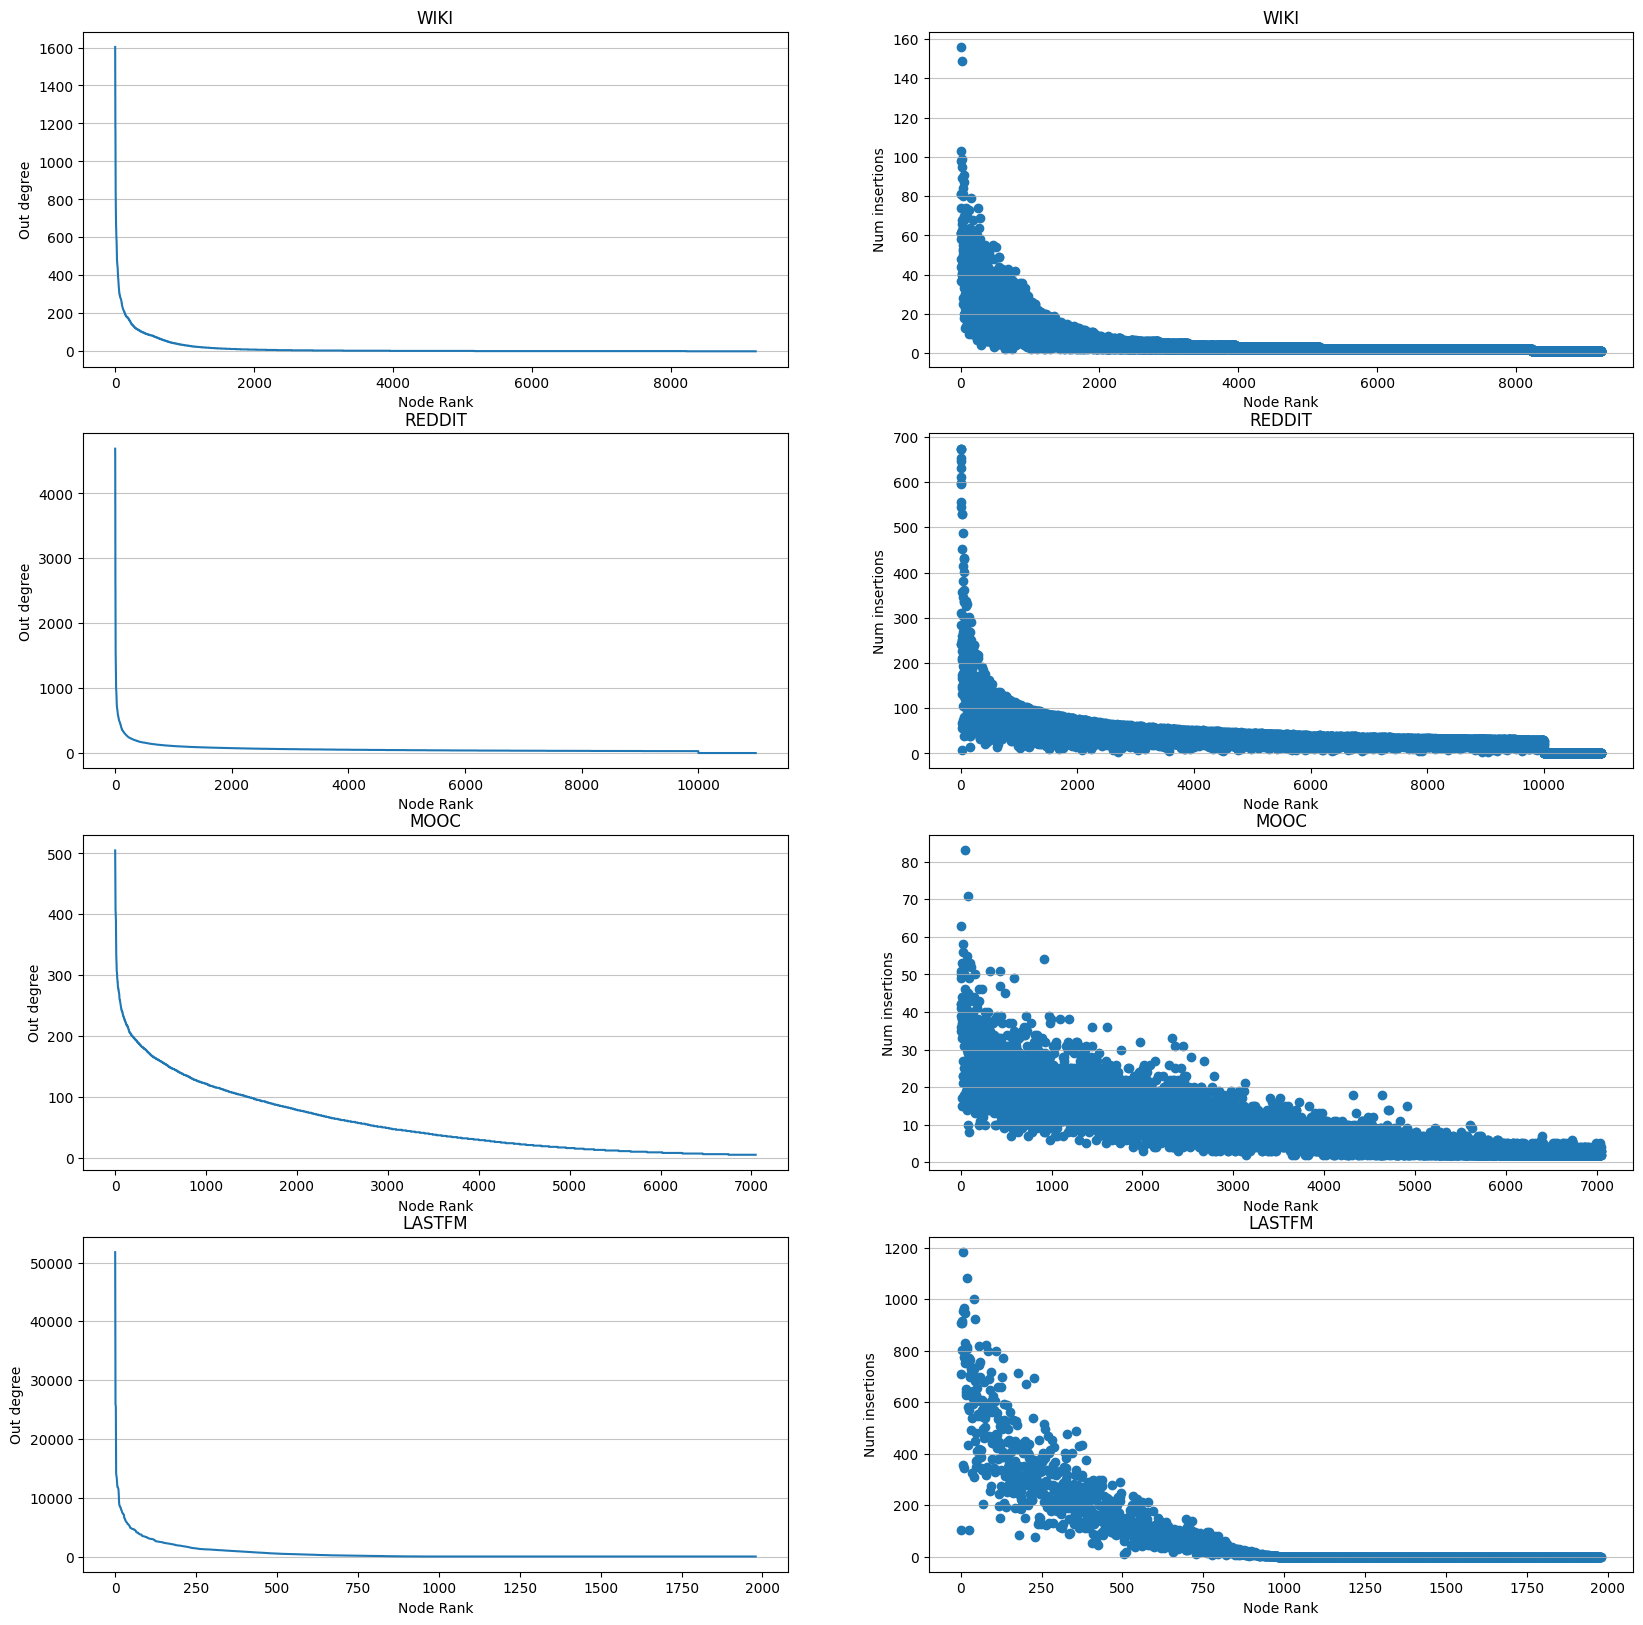

In [51]:
datasets = ['WIKI', 'REDDIT', 'MOOC', 'LASTFM']
strategies = ['naive', 'linearavg', 'lineardeg', 'lineardeg_adaptive']

subdir = 'tmp_res/adaptive_block_size_insights'

fig, axes = plt.subplots(len(datasets), 3, figsize=(20, 20), squeeze=False)
strategy = 'naive'
i = 0
for dataset in datasets:    
    out_degree = np.load(os.path.join(subdir, f'out_degree_{dataset}_{strategy}.npy'))
    out_degree_argsort = np.argsort(out_degree)[::-1]
    out_degree = out_degree[out_degree_argsort]

    axes[i, 0].plot(out_degree, label='out degree')
    axes[i, 0].set_xlabel('Node Rank')
    axes[i, 0].set_ylabel('Out degree')
    axes[i, 0].grid(axis='y', alpha=0.75)
    axes[i, 0].set_title(f'{dataset}')

    num_insertions = np.load(os.path.join(subdir, f'num_insertions_{dataset}_{strategy}.npy'))
    num_insertions = num_insertions[out_degree_argsort]
    # binning plot for num_insertions
    axes[i, 1].scatter(np.arange(len(num_insertions)),
        num_insertions, label='num insertions')
    axes[i, 1].set_xlabel('Node Rank')
    axes[i, 1].set_ylabel('Num insertions')
    axes[i, 1].grid(axis='y', alpha=0.75)
    axes[i, 1].set_title(
        f'{dataset}')
    # print(max(num_insertions))
    
    num_blocks = np.load(os.path.join(subdir, f'num_blocks_{dataset}_{strategy}.npy'))
    num_blocks = num_blocks[out_degree_argsort]
    # binning plot for num_blocks
    axes[i, 2].scatter(np.arange(len(num_blocks)),
        num_blocks, label='num blocks')
    axes[i, 2].set_xlabel('Node Rank')
    axes[i, 2].set_ylabel('Num blocks')
    axes[i, 2].grid(axis='y', alpha=0.75)
    axes[i, 2].set_title(
        f'{dataset} with {strategy}')
    print(max(num_blocks))
    
    
    # # corr
    # corr1 = np.corrcoef(out_degree, num_insertions)[0, 1]
    # corr2 = np.corrcoef(out_degree, num_blocks)[0, 1]

    # print(f'Correlation between out degree and num insertions of {dataset} with {strategy}: {corr1:.2f};'
    #       f'Correlation between out degree and num blocks of {dataset} with {strategy}: {corr2:.2f}')
    i += 1

plt.show()
    